In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import b3d
import sys

sys.path.append(str(b3d.get_root_path()))

In [3]:
from tests.sama4d.video_to_tracks.video_to_tracks_task import VideoToTracksTask
from tests.sama4d.video_to_tracks.solvers.conv_from_grid import KeypointTracker2DFromInitialGrid
import rerun

In [4]:
path = b3d.get_assets_path() / 'shared_data_bucket/dynamic_SfM/feature_track_data/pan_around_blocks.npz'
ftd_og = b3d.io.FeatureTrackData.load(str(path)).slice_time(20, 40)

In [5]:
rerun.init("multiple_patch_tracking-5")
rerun.connect("127.0.0.1:8812")

[2024-08-15T23:03:55Z WARN  re_sdk_comms::buffered_client] Failed to send message after 3 attempts: Failed to connect to Rerun server at 127.0.0.1:8812: Connection refused (os error 111)
[2024-08-15T23:03:58Z WARN  re_sdk_comms::buffered_client] Dropping messages because tcp client has timed out.
[2024-08-15T23:03:58Z WARN  re_sdk_comms::buffered_client] Dropping messages because tcp client has timed out.
[2024-08-15T23:03:58Z WARN  re_sdk_comms::tcp_client] Tried to flush while TCP stream was still Pending. Data was possibly dropped.


In [6]:
task = VideoToTracksTask.from_feature_track_data(ftd_og, has_no_moving_objects=True)
task.visualize_task()

In [68]:
spec = task.get_task_specification()
solver = KeypointTracker2DFromInitialGrid(
    grid_size_x=12, grid_size_y=12,
    patch_size=11, do_reinitialization=True,
    culling_l1_error_threshold=80,
    culling_error_ratio_threshold=0.8
)

In [70]:
solution = solver.solve(spec, save_states=False)

In [71]:
task.visualize_solution(solution, task.score(solution))

/home/georgematheos/b3d/tests/sama4d/video_to_tracks/video_to_tracks_task.py:158: UserWarning: The current scoring logic is a placeholder; it needs to be implemented.
  warnings.warn(


In [42]:
error_ratios = solver.get_error_ratios_for_saved_states()

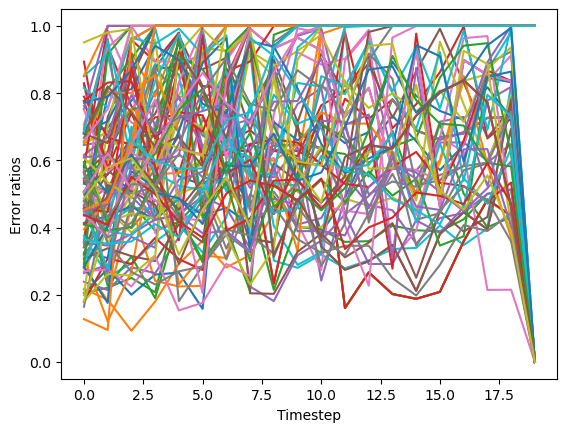

In [48]:
import numpy as np
import matplotlib.pyplot as plt
viz = solution["keypoint_visibility"]

for i in range(100): #l1_errors.shape[1]):
    plt.plot(np.where(viz[:, i], error_ratios[:, i], 1))

plt.xlabel('Timestep')
plt.ylabel('Error ratios')
plt.show()

In [ ]:
import jax.numpy as jnp
errors = jnp.ones(10, 20, 2)
y, x = 3, 6
jnp.where(
    jnp.linalg.norm(jnp.array([y, x]) - ) > 4,
    errors, jnp.inf
)

In [23]:
l1_errors = task.get_l1_errors(solution)

AttributeError: 'VideoToTracksTask' object has no attribute 'get_l1_errors'

In [24]:
l1_errors.shape

NameError: name 'l1_errors' is not defined

In [25]:
import matplotlib.pyplot as plt

for i in range(200): #l1_errors.shape[1]):
    plt.plot(l1_errors[:, i])

plt.xlabel('Index')
plt.ylabel('L1 Error')
plt.title('L1 Errors for each i')
plt.show()

NameError: name 'l1_errors' is not defined